## 0. EDA (*)
### In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.
  * a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.
  * b) Use describe only on those columns that are relevant to get statistical information from.
  * c) Make some plots on some of the columns that you find interesting.
  * d) Check if there are any columns you might want to drop.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Important link if it gets weird with certificates again:
# https://stackoverflow.com/questions/57483667/ssl-certificate-verify-failed-error-when-loading-data-into-seaborn
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

 
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df = df.drop('displacement', axis="columns")
df = df.drop('model_year', axis="columns")
df = df.drop('origin', axis="columns")
df = df.drop('name', axis='columns')

# X, y = df.drop('Sales', axis='columns'), df['Sales']

In [6]:
df.head()

,mpg,cylinders,horsepower,weight,acceleration
0,18.0,8,130.0,3504,12.0
1,15.0,8,165.0,3693,11.5
2,18.0,8,150.0,3436,11.0
3,16.0,8,150.0,3433,12.0
4,17.0,8,140.0,3449,10.5


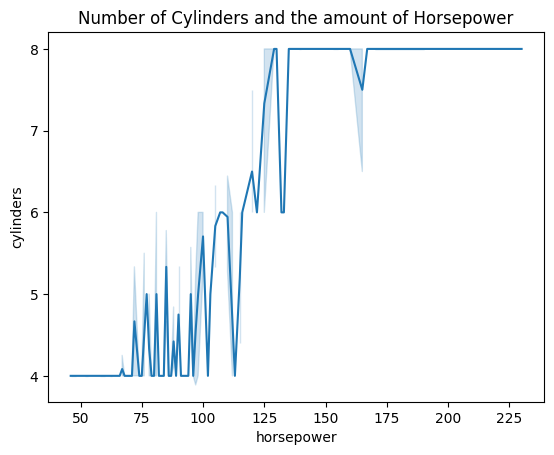

In [7]:
# Horsepowers with amount of Cylinders

ax = sns.lineplot(data=df, markers=True, x='horsepower', y='cylinders')
ax.set_title('Number of Cylinders and the amount of Horsepower')
plt.show()

Text(0.5, 1.0, 'Weight of the car and Miles Per Gallon')

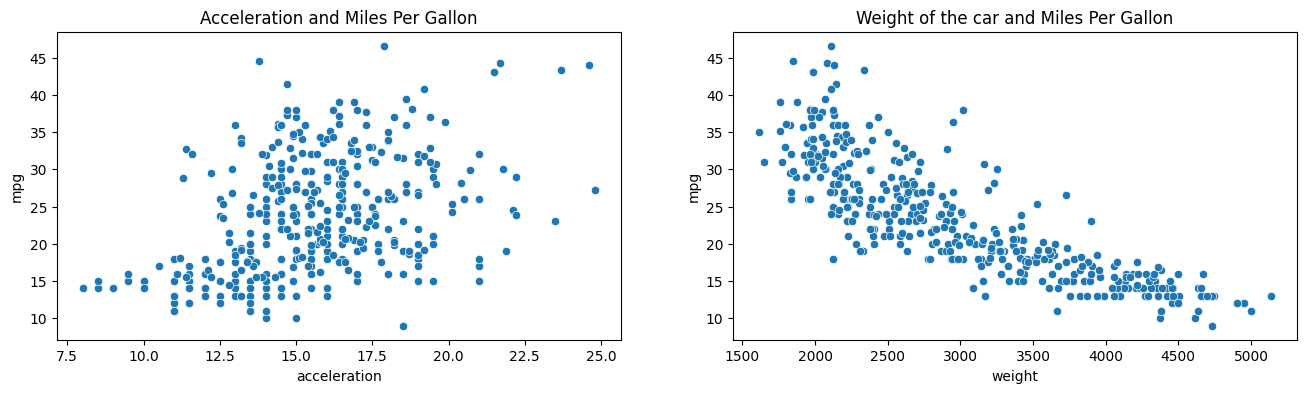

In [8]:
fig, axs = plt.subplots(1,2, figsize=(16,4))

sns.scatterplot(data=df, x='acceleration', y='mpg', ax=axs[0],)
axs[0].set_title('Acceleration and Miles Per Gallon')

sns.scatterplot(data=df, x='weight', y='mpg', ax=axs[1])
axs[1].set_title('Weight of the car and Miles Per Gallon')

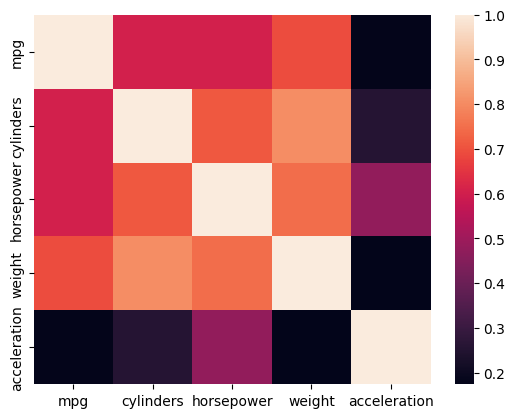

In [9]:
correlation = df.corr(numeric_only=True)**2

sns.heatmap(correlation);

# 1. Train|test split (*)
* We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. 
* Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.

In [10]:
df.head()

,mpg,cylinders,horsepower,weight,acceleration
0,18.0,8,130.0,3504,12.0
1,15.0,8,165.0,3693,11.5
2,18.0,8,150.0,3436,11.0
3,16.0,8,150.0,3433,12.0
4,17.0,8,140.0,3449,10.5


In [15]:
from sklearn.model_selection import train_test_split


# Drops only the dependant variable and puts it in y
y_df = df["mpg"]
X_df = df.drop("mpg",axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 4), (79, 4), (313,), (79,))

# 2. Function for evaluation (*)
Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression


def train_evaluate(X_train, X_test, y_test, y_train, model):
    # Training model
    model.fit(X_train, y_train)

    # predicting y-values based on X-values
    y_pred = model.predict(X_test)

    # calculating evaluation metrics
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    return MAE, MSE, RMSE


model_OLS = LinearRegression()

print(train_evaluate(X_train, X_test, y_train, y_test, model_OLS))

ValueError: Found input variables with inconsistent numbers of samples: [313, 79]